## Electrostatic GT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


k = 8.988e9 #In Nm2/C2
m = [1,100,200,400,800] #in kg
q = np.array([1,2,3,5]) #in C
Q = 10e8 #in C
R = 10e3#6.371e6 #in m

qk = np.sqrt(k)*q
Qk = np.sqrt(k)*Q
Rho_Q = 3*Q/(4*np.pi*R**3) #9.28 #in C/m3
Rho_Qk = np.sqrt(k)*Rho_Q

    
#Physical functions
def V(Q, q, m, R):
    return np.sqrt(2*Q*q/(m*R))


def T(rho, q, m):
    return np.sqrt(3*np.pi*m/(rho*q))



#Plotting functions
def Plot_mass():
    
    x = np.arange(1,10,0.1)
    Rho = Rho_Qk*x

    Time1 = T(Rho, qk[0], m[1]) #in s
    Time2 = T(Rho, qk[0], m[2]) #in s
    Time3 = T(Rho, qk[0], m[3]) #in s
    Time4 = T(Rho, qk[0], m[4]) #in s

    plt.xlabel(' 'r'$\rho[C/m^3]$')
    plt.ylabel('$T [s]$')
    plt.plot(x, Time1, 'b', label='m=100kg')
    plt.plot(x, Time2, 'r', label='m=200kg')
    plt.plot(x, Time3, 'y', label='m=400kg')
    plt.plot(x, Time4, 'g', label='m=800kg')
    plt.legend(fontsize='x-large')
    plt.savefig('Plots/1-Electrostatic_times_masses_py.pdf')



def Plot_charge():
    
    x = np.arange(1,10,0.1)
    Rho = Rho_Qk*x

    Time1 = T(Rho, qk[0], m[1]) #in s
    Time2 = T(Rho, qk[1], m[1]) #in s
    Time3 = T(Rho, qk[2], m[1]) #in s
    Time4 = T(Rho, qk[3], m[1]) #in s

    plt.xlabel('$\\rho \ [\\rho_c]$')
    plt.ylabel('$T \ [s]$')
    plt.plot(x, Time1, 'b', label='q=1 C')
    plt.plot(x, Time2, 'r', label='q=2 C')
    plt.plot(x, Time3, 'y', label='q=3 C')
    plt.plot(x, Time4, 'g', label='q=5 C')
    plt.legend(fontsize='x-large')
    plt.savefig('Plots/1-Electrostatic_times_charges_py.pdf')

    


def main():
    print('Density = ', Rho_Qk, 'C/m^3')
    
    Velocity = V(Qk, qk[0], m[0], R)
    print("v = ", Velocity, "m/s")
    print("  = ", Velocity/3e8, 'c')

    #Plot_mass()
    Plot_charge()

main()

## Special Relativistic GT

In [ ]:
"""
Description: Python code to compute effective potential, velocity 
            and traversal times for special relativistic tunnel.
"""
import numpy as np
import scipy.special as spy
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar as findroot
from scipy.integrate import odeint as ode

R1, R2, R3, R4 = 0.5, 1.0, 1.5, 2.0 

#Effective potential
def V(x, R):
    E = 1 + 0.5*R*R
    return 0.5*E*x**2 - 0.125*x**4 

def Plot_potentials():
    x1 = np.arange(-0.5,0.51,0.01)
    x2 = np.arange(-1  ,1.01,0.01)
    x3 = np.arange(-1.5,1.51,0.01)
    x4 = np.arange(-2  ,2.01,0.01)
    y1 = V(x1, R1) - V(R1, R1)
    y2 = V(x2, R2) - V(R2, R2)
    y3 = V(x3, R3) - V(R3, R3)
    y4 = V(x4, R4) - V(R4, R4)
    
    
    plt.xlabel('x')
    plt.ylabel('$V_{eff}(x)$')
    plt.plot(x1, y1, 'b', label='R = 0.5')
    plt.plot(x2, y2, 'r', label='R = 1')
    plt.plot(x3, y3, 'g', label='R = 1.5')
    plt.plot(x4, y4, 'y', label='R = 2')
    plt.legend()
    plt.savefig("Plots/2-Effecive_Potential_SR_py.pdf")
    
    
#Proper velocity
def v(x, R):
    Rp = np.sqrt(4 + R*R)
    return 0.5*np.sqrt(R**2*Rp**2 - (R**2 + Rp**2)*x**2 + x**4 )

def Plot_velocity():
    x1 = np.arange(0,R1,0.01)
    v1 = v(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{v} (x)$')    
    plt.plot(x1, v1, 'b')
    plt.savefig("Plots/3-Proper_velocity_py.pdf")



#Proper Trajectory of special relativity grav. train
    #Traversal times for proper observer
def tau(x, R):
    Rp = np.sqrt(4 + R*R)
    F = spy.ellipkinc(x/R, R/Rp)
    return 2/Rp*F

def Plot_tau():
    x1 = np.arange(0,R1,0.01)
    tau1 = tau(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{\tau} (x)$')    
    plt.plot(x1, tau1, 'r')
    plt.savefig("Plots/3-Proper_velocity_py.pdf")

    
    #Proper trajectory
def x(t, R):
    Rp = np.sqrt(4 + R*R)
    sn = spy.ellipj(np.pi*Rp*t , R/Rp )
    return sn[0]

def Plot_Prop_Trajectory():
    tau1 = np.arange(0,1.01,0.01)
    tau2 = np.arange(0,1.01,0.01)
    tau3 = np.arange(0,.74,0.01)
    tau4 = np.arange(0,.306,0.01)
    tau5 = np.arange(0,.11,0.01)
    Trajec1 = x(tau1, 0.0)
    Trajec2 = x(tau2, 1)
    Trajec3 = x(tau3, 4)
    Trajec4 = x(tau4, 16)
    Trajec5 = x(tau5, 64)
    
    
    plt.xlabel('tau')
    plt.ylabel('x (tau)')    
    plt.axes()
    plt.plot(tau1, Trajec1, 'b', label='R -> 0')
    plt.plot(tau2, Trajec2, 'y', label='R = 1')
    plt.plot(tau3, Trajec3, 'g', label='R = 4')
    plt.plot(tau4, Trajec4, 'r', label='R = 16')
    plt.plot(tau5, Trajec5, 'c', label='R = 64')
    plt.legend()    
    plt.savefig("Plots/1-SRel_Traj__Prop.pdf")


#Coordinate Trajectory 

def t(x, tau):
    R = R1
    Rp = np.sqrt(4 + R*R)
    E = spy.ellipeinc(x/R, R/Rp)
    F = spy.ellipkinc(x/R, R/Rp)
    return Rp*E - 2/Rp*F - tau


def Coordinate_Trajectory_Eq(x, t, R):
    E = 1 + 0.5*R*R
    dxdt = np.sqrt(1 - 1/(E - 0.5*x**2)**2)
    return dxdt

def Solve_trajectory():
    t_array = np.arange(0, 5.1, 0.1)
    t0 = 0
    R = 4
    
    solution = ode(Coordinate_Trajectory_Eq, t0, t_array, args=(R,))
    
    X = np.zeros(51)
    for i in np.arange(51):
        X[i] = solution[i]
        print (t_array[i], X[i])

def Plot_Coord_Trajectory():
    x = np.arange(0, 10, 0.01)
    Traj = t(x, 4)/(2*np.pi)
    
    plt.xlabel('t')
    plt.ylabel('x (t)')
    
    plt.plot(Traj, x)
    plt.show()


def main():
    #Solve_trajectory()
    
    #Plot_potentials()
    #Plot_velocity()
    #Plot_tau
    #Plot_Prop_Trajectory()
    Plot_Coord_Trajectory()
    print(tau(0.1,R1))
    print(tau(0.1,R2))
    
    

main()

## General Relaticistic GT

to start the generalization, consider Schwarzschild's interior metric

\begin{equation}
    ds^2 = - \left( \frac{3}{2} \sqrt{ 1 - 2 \hat{R}^2 } - \frac{1}{2} \sqrt{1 - 2 r^2} \right)^2 c^2 dt^2 + \frac{dr^2}{1 - 2 r}
\end{equation}

where we have dropped the angular dependence because of the clear symmetry of the problem, and in this case the non dimensional radius is


\begin{equation*}
    \hat{R} = \omega R = \sqrt{\frac{GM}{R}}.
\end{equation*}


### Null trajectory

Let's consider first the simplest of all cases for this situation, i.e., that of a massless particle. For this, $ds^2 = 0$, so can find the trajectory as

\begin{equation*}
    \frac{dr}{dt} = \frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2} \\
    \int \frac{dr}{\frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2}} = \int dt \\
    \frac{1}{\sqrt{4 - 9R^2}}\arctan{\left [ \frac{r \sqrt{4-9R^2}\left(1 + 3\sqrt{(1-2r^2)(1-2R^2)} \right)}{4 - 9R^2 - 9r^2 (1- 2R^2)} \right] }= t,
\end{equation*}

Which we can solve with Python

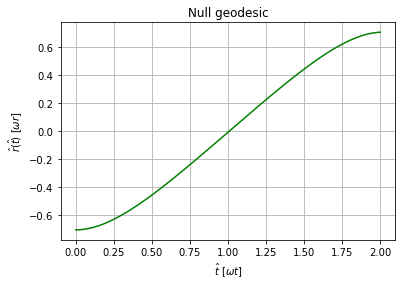

In [12]:
import numpy as np
from scipy.integrate import odeint as ode
import matplotlib.pyplot as plt

def Null_Trajectory(x, t, R):
    dxdt = 1.5*np.sqrt((1 - 2*x**2)*(1 - 2*R**2)) + x**2 - 0.5
    return dxdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r

def Plot_Null_trajectory(t, x):
    plt.title('Null geodesic')
    plt.xlabel('$\hat{t} \ [\omega t] $')
    plt.ylabel('$\hat{r}(\hat{t}) \ [\omega r] $')
    plt.plot(t, x, 'g')
    plt.grid()
    #plt.savefig("Plots/Null_Trajectory_py.pdf")

#Integration interval, step and number of steps
t0, tf, dt = 0, 2, 0.01
t = np.arange(t0, tf+dt, dt) 
N = int((tf-t0)/dt)

#Initial conditions
R = [0.2,0.4,0.6,2/3]
x0 =  -1/np.sqrt(2)
    
x = np.zeros([N,3])
Trajectory = Null_Trajectory

x = Solve_trajectory(Trajectory, t, x0, R[0], N+1)

Plot_Null_trajectory(t,x)


## Massive Trajectories

### Effective Potential

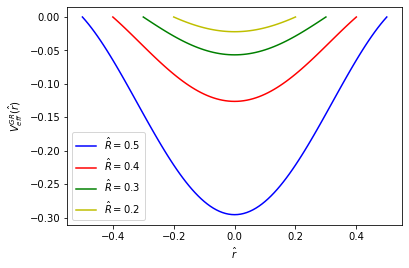

In [14]:

def V(r,R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    return -0.5*pow(E*x,2)*( (5-x)*(x-1)/(x-3)**2)

    
def Plot_potentials():
    R1, R2, R3, R4 = 0.5, 0.4, 0.3, 0.2
    x1 = np.arange(-0.5,0.51,0.01)
    x2 = np.arange(-0.4,0.41,0.01)
    x3 = np.arange(-0.3,0.31,0.01)
    x4 = np.arange(-0.2,0.21,0.01)
    y1 = V(x1, R1) - V(R1, R1)
    y2 = V(x2, R2) - V(R2, R2)
    y3 = V(x3, R3) - V(R3, R3)
    y4 = V(x4, R4) - V(R4, R4)
    
    plt.xlabel('$\hat{r}$')
    plt.ylabel('$V_{eff}^{GR}(\hat{r})$')
    plt.plot(x1, y1, 'b', label='$\hat{R} = 0.5$')
    plt.plot(x2, y2, 'r', label='$\hat{R} = 0.4$')
    plt.plot(x3, y3, 'g', label='$\hat{R} = 0.3$')
    plt.plot(x4, y4, 'y', label='$\hat{R} = 0.2$')
    plt.legend()
    #plt.savefig("Plots/Effecive_Potential_GR_py.pdf")
    
Plot_potentials()

In [ ]:

import matplotlib.pyplot as plt
from scipy.integrate import odeint as ode


def Massive_Trajectory(r , t, R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    drdt = E*x*np.sqrt((5-x)*(x-1))/(3-x)
    return drdt

    
def Plot_Massive_trajectory(t, x):
    plt.title('Null geodesic')
    plt.xlabel('$\hat{t} \ [\omega t ] $')
    plt.ylabel('$\hat{r} \ [\omega r ] $')
    plt.plot(t, x, 'g')
    plt.grid()
    plt.savefig("Plots/Massive_Trajectory_py.pdf")

def main():
    t0, tf, dt = 0, 1.56, 0.01
    t = np.arange(t0, tf+dt, dt) 
    
    N = int((tf-t0)/dt)

    R = [0.2,0.4,0.6,2/3]
    x0 =  0.0
    
    x = np.zeros([N,3])
    Trajectory = Massive_Trajectory

    x = Solve_trajectory(Trajectory, t, x0, R[0], N+1)
   
    """
    for i in np.arange(15):
        x[i:0] = Solve_trajectory(Trajectory, t, x0, R[0], N+1)[i]
        print(t[i], x[i][0])
    
"""    
    tau = t/(2*np.pi)
    Plot_Massive_trajectory(t, x)

    #Plot_potentials()


main()
